# 선형회귀

In [1]:
import pandas as pd
file_path = '/Users/chojungseok/Desktop/code/DAMF2/ML/data/Fish.csv'
df = pd.read_csv(file_path)

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
perch_df = df.loc[df['Species'] == 'Perch']

In [3]:
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

# perch_length

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_traget, test_target = train_test_split(perch_length, perch_weight)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_traget)

LinearRegression()

In [7]:
lr.score(test_input, test_target)

0.8795580847920165

In [8]:
lr.predict([[50]])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1206.60562359]])

In [9]:
# 기울기(가중치)
lr.coef_[0][0]

np.float64(37.04054021317276)

In [10]:
# y절편
lr.intercept_[0]

np.float64(-645.4213870718708)

In [11]:
train_input['Length2'].min()

np.float64(8.4)

Text(0, 0.5, 'Weight')

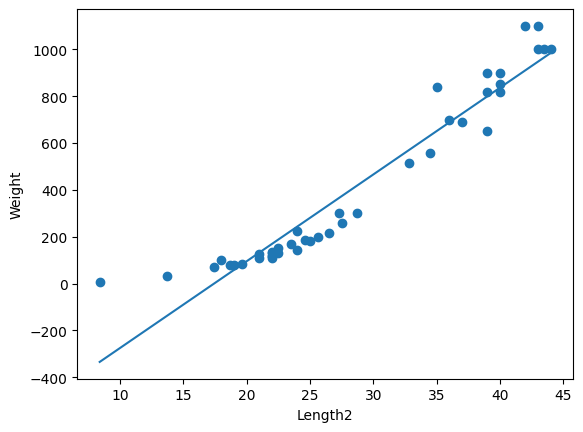

In [12]:
import matplotlib.pyplot as plt
plt.scatter(train_input['Length2'], train_traget['Weight'])

plt.plot([train_input['Length2'].min(), train_input['Length2'].max()], [train_input['Length2'].min() * lr.coef_[0][0] + (lr.intercept_[0]), train_input['Length2'].max() * lr.coef_[0][0] + (lr.intercept_[0])]) # lr모델에서 사용한 가중치와 y절편을 활용하여 모델이 그린 선형 모델 시각화
plt.xlabel('Length2')
plt.ylabel('Weight')

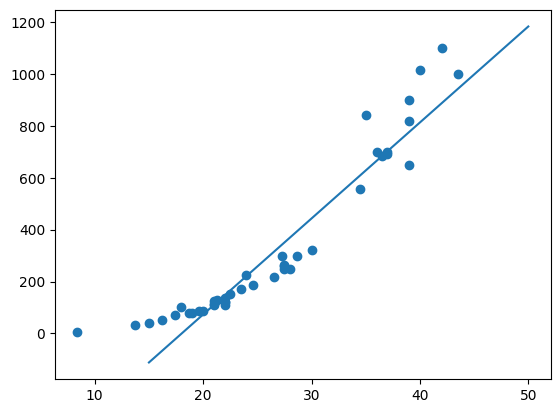

In [187]:
plt.plot([15,50], [15 * 37 - 667, 50 * 37 -667])

기울기 = 가중치?  
y = ax + b에서 x가 증가 할때마다 a의 영향을 받아 값이 증가 하기 때문에 a가 x에 얼만큼 영향을 끼치는가?

In [188]:
lr.score(train_input, train_traget)

0.8929495912641797

In [189]:
lr.score(test_input,test_target)

0.949982230982202

In [190]:
lr.predict([[1]])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-556.54169154]])

## 다항회귀

In [191]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input

,Length2,Length2_poly
84,21.0,441.00
86,22.0,484.00
79,19.0,361.00
111,35.0,1225.00
101,26.5,702.25
95,23.5,552.25
106,28.0,784.00
90,22.0,484.00
96,24.0,576.00
112,36.5,1332.25


In [192]:
lr = LinearRegression()

In [193]:
lr.fit(train_input, train_traget)

LinearRegression()

In [194]:
lr.score(test_input, test_target)

0.9792992034197772

In [195]:
lr.predict([[2, 4]])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[127.94504105]])

In [196]:
print(lr.coef_, lr.intercept_)

[[-26.32982782   1.10544842]] [176.18290301]
